# Exploratory Data Analysis

##### Aziz Maredia, Katharine King, Manuel Sainz de la Peña, Max Bosse | DSIR-1019 | 12.23.20

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import geopandas as gpd
from shapely.geometry import Point, Polygon

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./datasets/combined_df.csv')
df.head()

,Unnamed: 0,state,college,cases,college_size_category,distance_educ_offered,admissions_total,freshmen_enrollment,admissions_men,admissions_women,number_freshmen_submitting_sat,number_freshmen_submitting_act,sat_ebrw_25,sat_ebrw_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_english_25,act_english_75,act_math_25,act_math_75,football_conference,region,status_reopening,stay_at_home_order,large_gatherings,restaurant_limits,bar_closures,face_coverings,class_plan,total_enrollment,percent_infected,greater_than_5
0,0,Alabama,Alabama A&M University,41.0,3.0,1.0,8789.0,1710.0,2828.0,5961.0,592.0,1251.0,430.0,510.0,410.0,500.0,15.0,19.0,14.0,20.0,15.0,18.0,Southwestern Athletic Conference,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,6106,0.006715,0
1,1,Alabama,Alabama State University,2.0,2.0,1.0,6467.0,1023.0,1963.0,4320.0,275.0,819.0,450.0,510.0,430.0,510.0,15.0,19.0,14.0,20.0,15.0,17.0,Southwestern Athletic Conference,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,4413,0.000453,0
2,2,Alabama,Auburn University,2134.0,5.0,1.0,16300.0,4808.0,6997.0,9303.0,866.0,3911.0,580.0,650.0,570.0,670.0,25.0,31.0,25.0,33.0,23.0,28.0,Southeastern Conference,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,30440,0.070105,1
3,3,Alabama,Auburn University at Montgomery,140.0,3.0,1.0,3716.0,626.0,1306.0,2410.0,39.0,530.0,470.0,570.0,450.0,580.0,19.0,23.0,19.0,24.0,16.0,22.0,Not applicable,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,5211,0.026866,0
4,4,Alabama,Birmingham-Southern College,214.0,2.0,1.0,1821.0,332.0,842.0,979.0,58.0,246.0,570.0,660.0,540.0,650.0,22.0,29.0,22.0,30.0,20.0,27.0,Southern Athletic Association,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Primarily in person,1268,0.168770,1


In [3]:
# Drop Unnecessary Column
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,state,college,cases,college_size_category,distance_educ_offered,admissions_total,freshmen_enrollment,admissions_men,admissions_women,number_freshmen_submitting_sat,number_freshmen_submitting_act,sat_ebrw_25,sat_ebrw_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_english_25,act_english_75,act_math_25,act_math_75,football_conference,region,status_reopening,stay_at_home_order,large_gatherings,restaurant_limits,bar_closures,face_coverings,class_plan,total_enrollment,percent_infected,greater_than_5
0,Alabama,Alabama A&M University,41.0,3.0,1.0,8789.0,1710.0,2828.0,5961.0,592.0,1251.0,430.0,510.0,410.0,500.0,15.0,19.0,14.0,20.0,15.0,18.0,Southwestern Athletic Conference,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,6106,0.006715,0
1,Alabama,Alabama State University,2.0,2.0,1.0,6467.0,1023.0,1963.0,4320.0,275.0,819.0,450.0,510.0,430.0,510.0,15.0,19.0,14.0,20.0,15.0,17.0,Southwestern Athletic Conference,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,4413,0.000453,0
2,Alabama,Auburn University,2134.0,5.0,1.0,16300.0,4808.0,6997.0,9303.0,866.0,3911.0,580.0,650.0,570.0,670.0,25.0,31.0,25.0,33.0,23.0,28.0,Southeastern Conference,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,30440,0.070105,1
3,Alabama,Auburn University at Montgomery,140.0,3.0,1.0,3716.0,626.0,1306.0,2410.0,39.0,530.0,470.0,570.0,450.0,580.0,19.0,23.0,19.0,24.0,16.0,22.0,Not applicable,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Hybrid,5211,0.026866,0
4,Alabama,Birmingham-Southern College,214.0,2.0,1.0,1821.0,332.0,842.0,979.0,58.0,246.0,570.0,660.0,540.0,650.0,22.0,29.0,22.0,30.0,20.0,27.0,Southern Athletic Association,South,Paused,Lifted,Lifted,Reopened to Dine-in Service,Reopened,Required for General Public,Primarily in person,1268,0.168770,1


In [4]:
# Look at the dtypes of the columns: Object columns will need to be dummified before modeling
df.dtypes

state                              object
college                            object
cases                             float64
college_size_category             float64
distance_educ_offered             float64
admissions_total                  float64
freshmen_enrollment               float64
admissions_men                    float64
admissions_women                  float64
number_freshmen_submitting_sat    float64
number_freshmen_submitting_act    float64
sat_ebrw_25                       float64
sat_ebrw_75                       float64
sat_math_25                       float64
sat_math_75                       float64
act_comp_25                       float64
act_comp_75                       float64
act_english_25                    float64
act_english_75                    float64
act_math_25                       float64
act_math_75                       float64
football_conference                object
region                             object
status_reopening                  

In [5]:
#Check for null values. None found. 
df.isnull().sum()

state                             0
college                           0
cases                             0
college_size_category             0
distance_educ_offered             0
admissions_total                  0
freshmen_enrollment               0
admissions_men                    0
admissions_women                  0
number_freshmen_submitting_sat    0
number_freshmen_submitting_act    0
sat_ebrw_25                       0
sat_ebrw_75                       0
sat_math_25                       0
sat_math_75                       0
act_comp_25                       0
act_comp_75                       0
act_english_25                    0
act_english_75                    0
act_math_25                       0
act_math_75                       0
football_conference               0
region                            0
status_reopening                  0
stay_at_home_order                0
large_gatherings                  0
restaurant_limits                 0
bar_closures                

## Creating choropleth map to compare states by rate of colleges with greater than 5% infection rate

In [18]:
usa = gpd.read_file('./states_geopandas/states.shp')
usa.shape

(51, 6)

In [7]:
usa.head(10)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
0,Hawaii,1,15,Pacific,HI,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,Washington,2,53,Pacific,WA,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,Montana,3,30,Mountain,MT,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,Maine,4,23,New England,ME,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,North Dakota,5,38,West North Central,ND,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."
5,South Dakota,6,46,West North Central,SD,"POLYGON ((-102.78838 42.99530, -103.00588 42.9..."
6,Wyoming,7,56,Mountain,WY,"POLYGON ((-104.05362 41.69822, -104.05550 41.5..."
7,Wisconsin,8,55,East North Central,WI,"MULTIPOLYGON (((-87.74856 44.96162, -87.83999 ..."
8,Idaho,9,16,Mountain,ID,"POLYGON ((-117.02630 43.67903, -117.02379 43.7..."
9,Vermont,10,50,New England,VT,"POLYGON ((-73.25806 42.74606, -73.26928 42.747..."


In [8]:
geo_df = df[['state', 'greater_than_5']]

dg = geo_df.groupby('state').mean()
dg.reset_index(level = 0, inplace = True)
dg['state'].replace('Washington, D.C.', 'District of Columbia', inplace = True)

usa = usa.merge(dg, how = 'left', left_on = 'STATE_NAME', right_on = 'state')[['STATE_NAME', 'geometry', 'greater_than_5']]
usa.drop(usa.loc[(usa['STATE_NAME'] == 'Alaska') | (usa['STATE_NAME'] == 'Hawaii'), :].index, inplace = True)

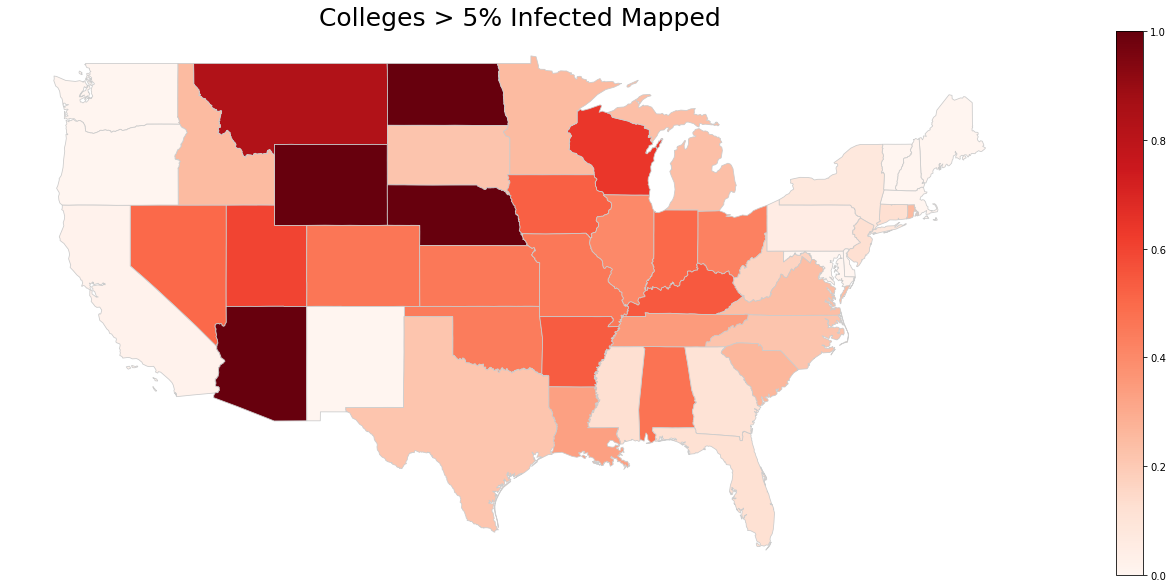

In [9]:
variable = 'greater_than_5' # set the value column that will be visualised
vmin, vmax = 0, 1 # set the range for the choropleth values
fig, ax = plt.subplots(1, figsize = (30,10)) # create figure and axes for Matplotlib
ax.axis('off') # remove the axis
ax.set_title('Colleges > 5% Infected Mapped', fontdict = {'fontsize':'25', 'fontweight':'3'}) # add a title
sm = plt.cm.ScalarMappable(cmap = 'Reds', norm = plt.Normalize(vmin = vmin, vmax = vmax)) # Create colorbar legend
sm.set_array([]) # empty array for the data range
fig.colorbar(sm) # add the colorbar to the figure
usa.plot(column = variable, cmap = 'Reds', linewidth = 0.8, ax = ax, edgecolor = '0.8'); # create map
plt.savefig('./images/colleges_greater_5_mapped.png', bbox_inches = "tight")

In [10]:
#Summary stats for our columns
df.describe()

,cases,college_size_category,distance_educ_offered,admissions_total,freshmen_enrollment,admissions_men,admissions_women,number_freshmen_submitting_sat,number_freshmen_submitting_act,sat_ebrw_25,sat_ebrw_75,sat_math_25,sat_math_75,act_comp_25,act_comp_75,act_english_25,act_english_75,act_math_25,act_math_75,total_enrollment,percent_infected,greater_than_5
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,350.009164,2.822451,0.896907,5467.096220,1374.271478,2283.662085,3182.380298,839.376861,657.446735,523.119129,620.879725,518.483391,620.643757,20.935853,26.471936,20.117984,26.886598,19.678121,25.862543,9376.229095,0.037131,0.252005
std,711.413701,1.209424,0.304254,6574.327341,1714.009648,2957.518231,3692.359563,1265.503748,956.852457,66.360649,60.133323,74.303000,74.419020,4.164398,3.935192,4.778445,4.706497,3.935045,3.733604,11513.535758,0.037513,0.434413
min,0.000000,1.000000,0.000000,18.000000,8.000000,0.000000,0.000000,3.000000,2.000000,280.000000,330.000000,230.000000,410.000000,13.000000,16.000000,11.000000,15.000000,14.000000,15.000000,104.000000,0.000000,0.000000
25%,38.000000,2.000000,1.000000,1476.000000,342.000000,596.000000,841.000000,130.000000,129.000000,480.000000,580.000000,470.000000,570.000000,18.000000,24.000000,17.000000,23.000000,17.000000,24.000000,2000.000000,0.010628,0.000000
50%,109.000000,2.000000,1.000000,2919.000000,654.000000,1152.000000,1729.000000,350.000000,268.000000,510.000000,620.000000,510.000000,610.000000,20.000000,26.000000,19.000000,26.000000,18.000000,26.000000,4274.000000,0.025791,0.000000
75%,294.000000,4.000000,1.000000,6620.000000,1659.000000,2608.000000,4136.000000,942.000000,739.000000,560.000000,660.000000,550.000000,660.000000,23.000000,29.000000,22.000000,31.000000,22.000000,28.000000,11817.000000,0.050212,1.000000
max,5806.000000,5.000000,1.000000,72880.000000,15989.000000,35689.000000,37053.000000,12350.000000,6005.000000,740.000000,770.000000,790.000000,800.000000,35.000000,36.000000,35.000000,36.000000,35.000000,36.000000,79152.000000,0.331081,1.000000


## Important takeways from our summary stats:

1) 50th percentile infection rate ~ 2.6%.

2) 75th percentile infection rate ~ 5.0%.

3) 100th percentile infection rate ~ 33.1%.

4) Mean enrollment for the universities analyzed was 9,376 students.

In [11]:
df.groupby('greater_than_5').mean().T

greater_than_5,0,1
cases,186.715161,834.695455
college_size_category,2.833078,2.790909
distance_educ_offered,0.889740,0.918182
admissions_total,5165.940276,6360.981818
freshmen_enrollment,1261.667688,1708.500000
admissions_men,2108.736600,2802.872727
admissions_women,3056.218989,3556.850000
number_freshmen_submitting_sat,845.442573,821.372727
number_freshmen_submitting_act,521.947933,1059.631818
sat_ebrw_25,523.001531,523.468182


## Important takeaway from groupby analysis

Schools with greater than 5% infection rate had an average enrollement of ~706 more students relative to schools with an infection rate of 5% or less.

 


## Distribution of school infection rates

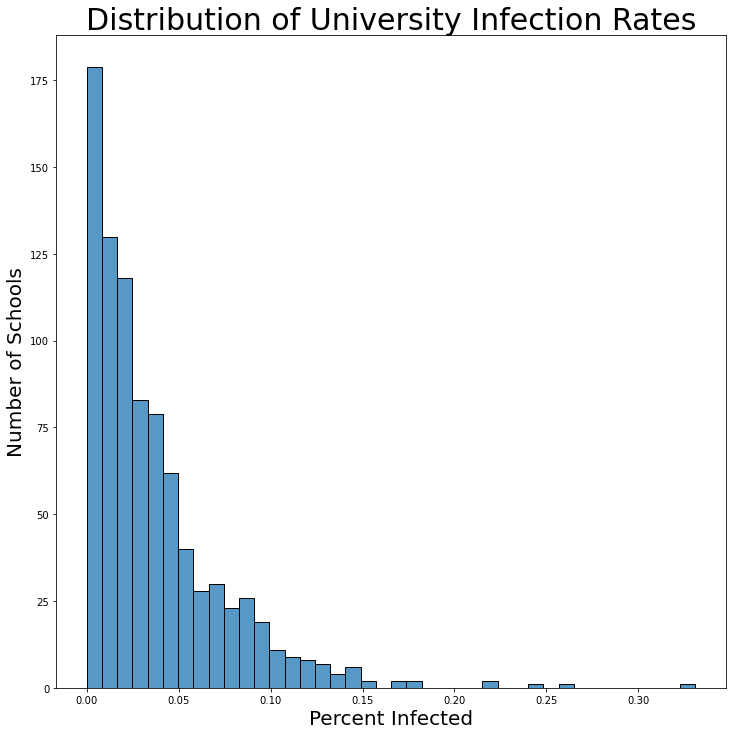

In [12]:
plt.figure(figsize=(12,12))
ax = sns.histplot(df['percent_infected'])
ax.set_title('Distribution of University Infection Rates',fontsize=30)
ax.set_xlabel('Percent Infected', fontsize=20)
ax.set_ylabel('Number of Schools',fontsize=20)
plt.savefig('./images/distribution_of_university_infection_rates_histogram.png',bbox_inches = "tight")

## SNS Heatmap

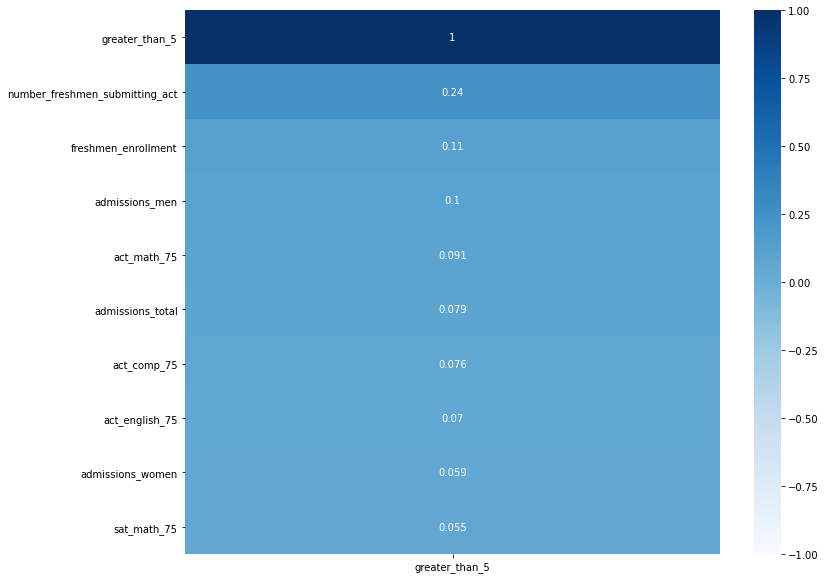

In [13]:
plt.figure(figsize=(12,10))
sns.heatmap(df.drop(columns=['percent_infected','cases']).corr()[['greater_than_5']].sort_values(by='greater_than_5', ascending=False).head(10),
           annot=True,
           vmin=-1,vmax=1,
           cmap='Blues');
plt.savefig('./images/heatmap.png',bbox_inches = "tight")

## SNS Correlation Matrix

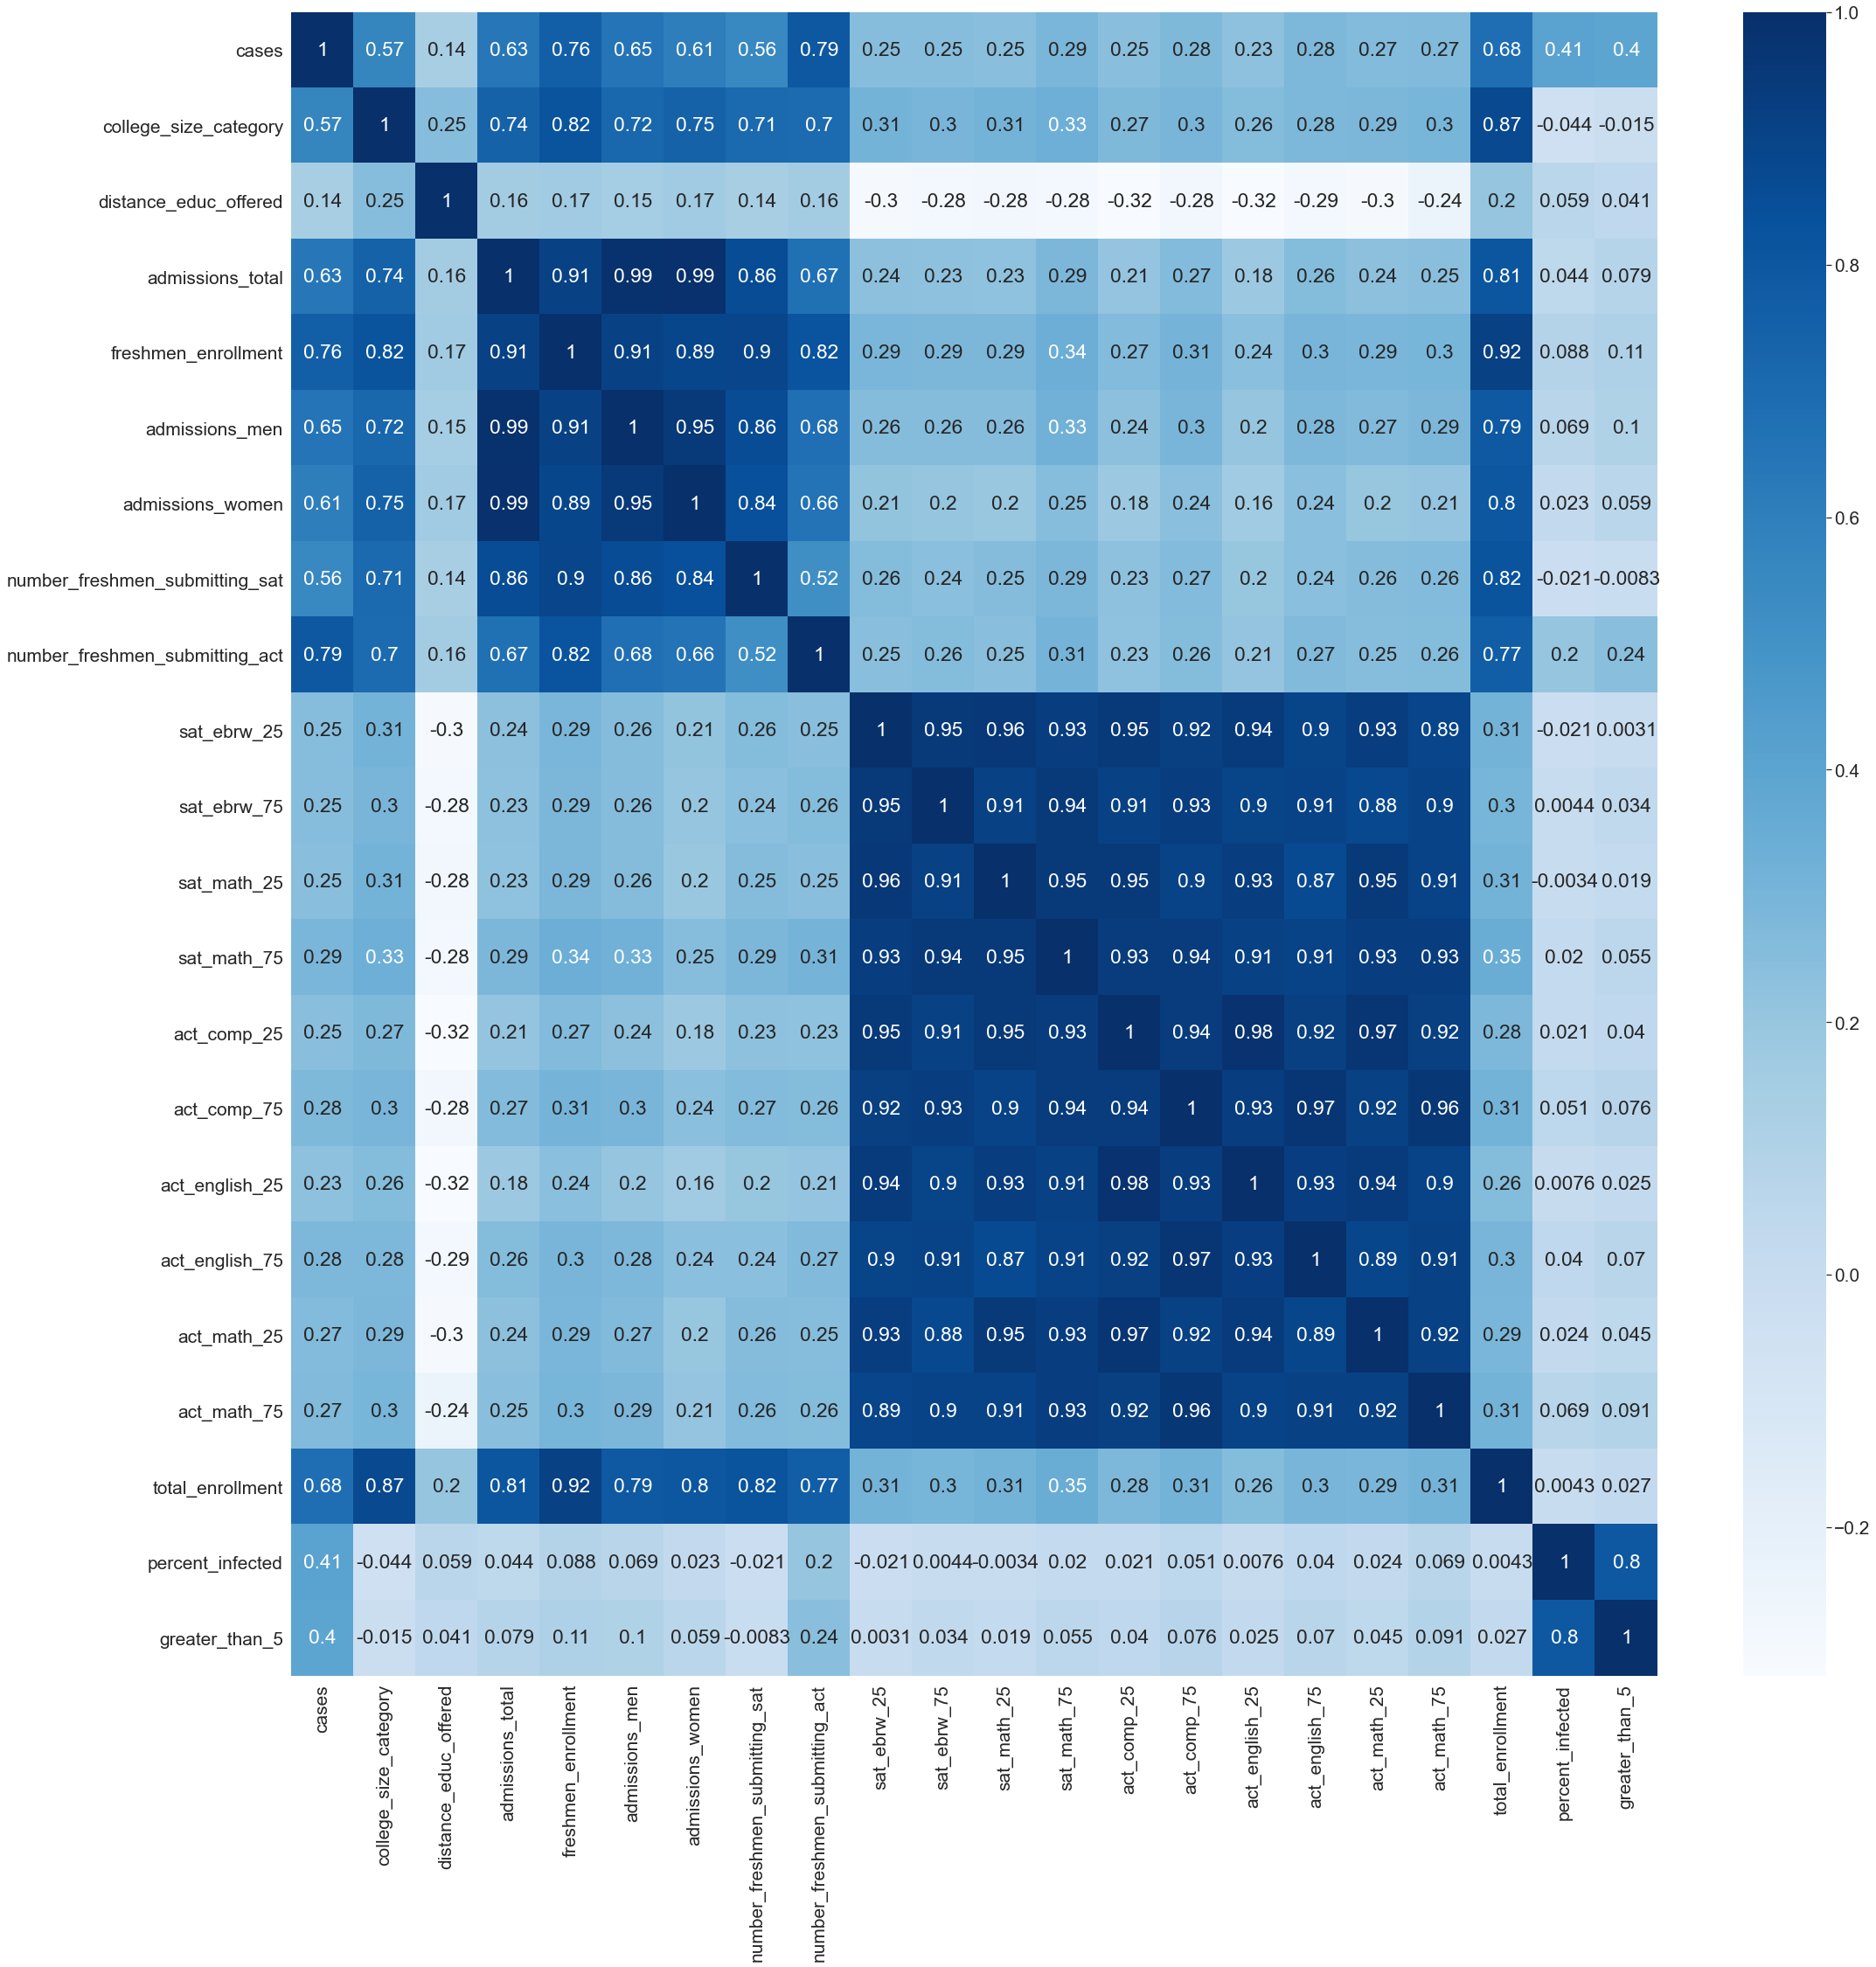

In [14]:
sns.set(font_scale=1.9)
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(), annot=True,cmap='Blues')
plt.xticks(rotation=90)
plt.savefig('./images/corr_matrix.png',bbox_inches = "tight");

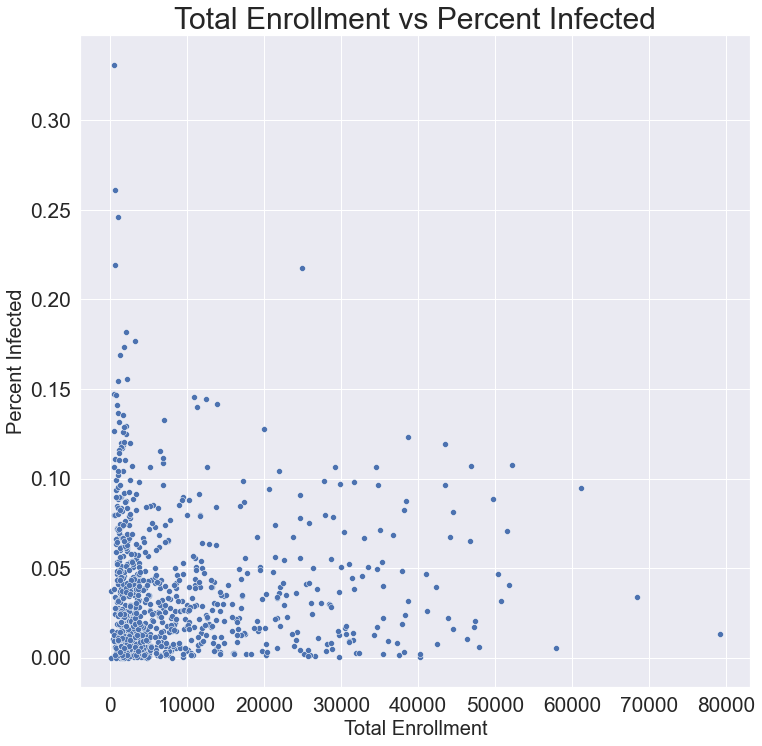

In [15]:
plt.figure(figsize=(12,12))
ax = sns.scatterplot(x='total_enrollment',y='percent_infected',data=df)
ax.set_title('Total Enrollment vs Percent Infected',fontsize=30)
ax.set_xlabel('Total Enrollment', fontsize=20)
ax.set_ylabel('Percent Infected',fontsize=20)
plt.savefig('./images/enrollment_vs_infected_scatter.png',bbox_inches = "tight");

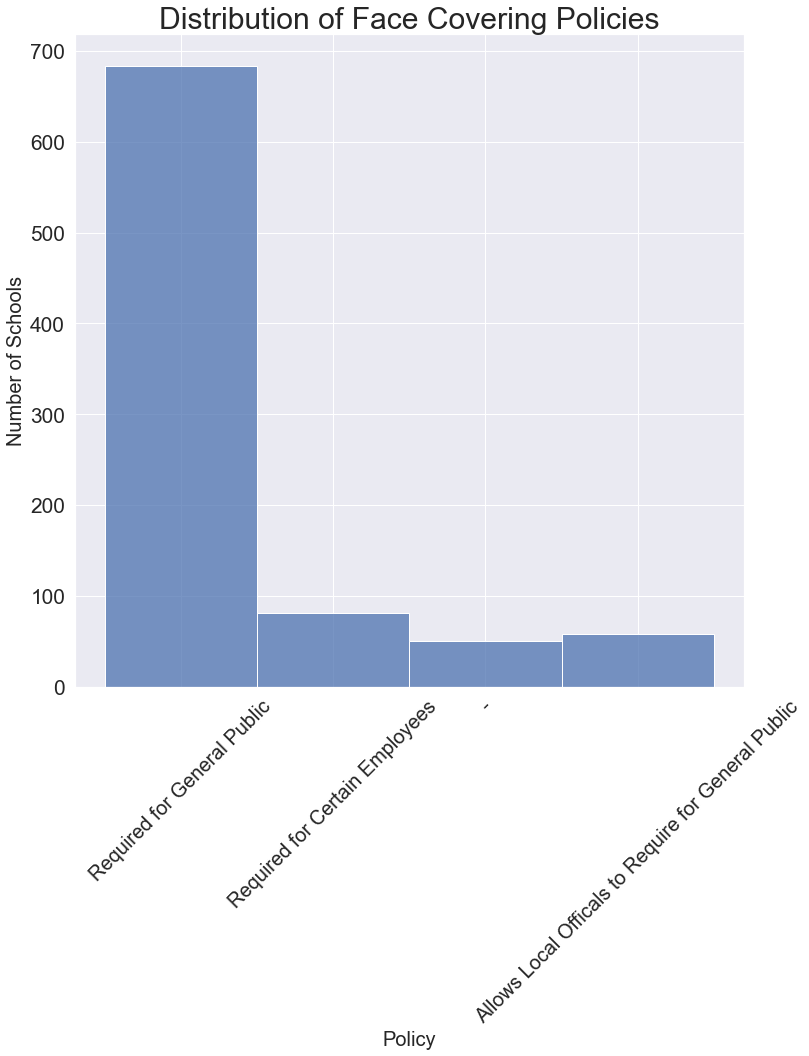

In [16]:
plt.figure(figsize=(12,12))
ax = sns.histplot(df['face_coverings'])
ax.set_title('Distribution of Face Covering Policies',fontsize=30)
ax.set_xlabel('Policy', fontsize=20)
ax.set_ylabel('Number of Schools',fontsize=20)
plt.xticks(rotation=45,fontsize=20);
plt.savefig('./images/facecovering_distribution.png', bbox_inches = "tight")

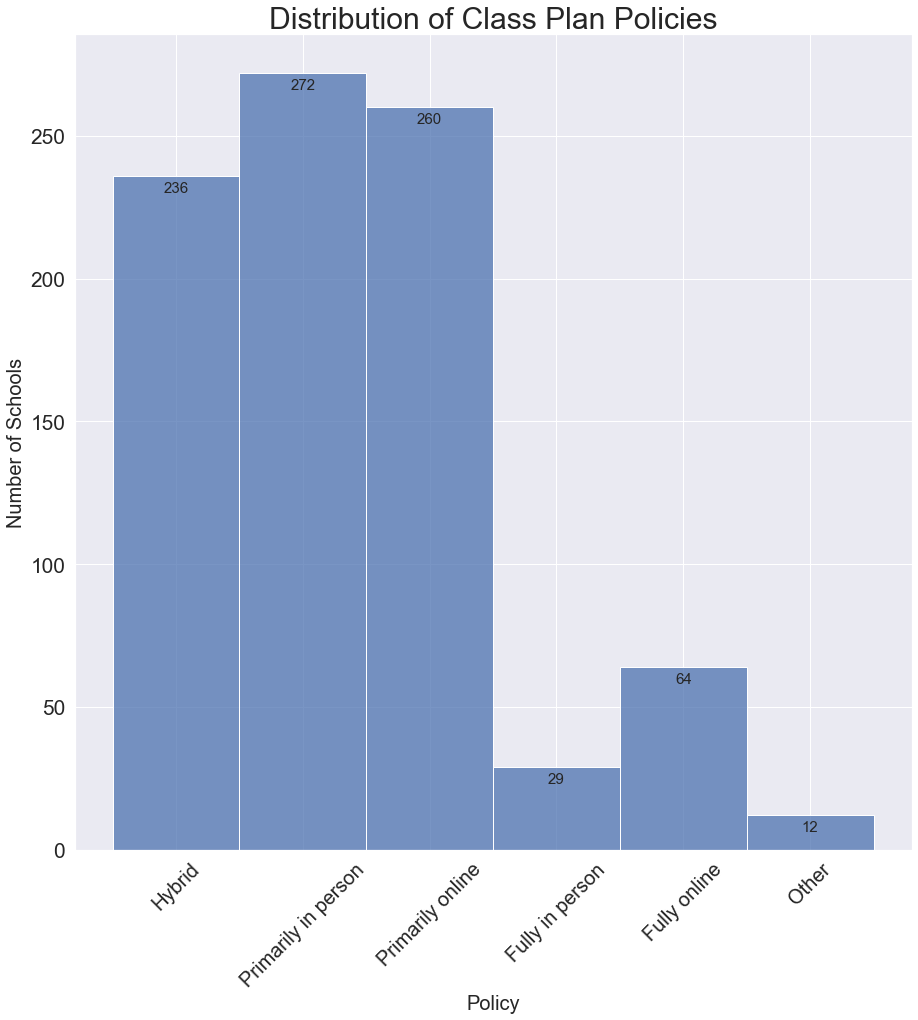

In [17]:
plt.figure(figsize=(15,15))
ax = sns.histplot(df['class_plan'])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
ax.set_title('Distribution of Class Plan Policies',fontsize=30)
ax.set_xlabel('Policy', fontsize=20)
ax.set_ylabel('Number of Schools',fontsize=20)
plt.xticks(rotation=45,fontsize=20);
plt.savefig('./images/distribution_classplan.png', bbox_inches = "tight")